##Реализация Алгоритма k-means

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 5000
n_clusters = 10
X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = n_clusters, random_state = 999)
X_start = np.copy(X)
#C = make_circles(n_samples=n_samples, random_state=2, factor=.44)
#X = np.array(C[0])
#gen = np.array([i / 500 for i in range(n_samples//2)])
#Z = np.array([[i+5, np.sqrt(-(i - 1)**2 + 1)] for i in gen])
#Z = np.append(Z, [[i+5, -np.sqrt(-(i - 1)**2 + 1)] for i in gen], axis=0)
#X = Z

##Ручная генерация точек

In [56]:
def random_points():
    X = np.zeros((n_samples, 2), dtype=float)
    X[:, 0] = np.random.random_sample((n_samples))
    X[:, 1] = np.random.random_sample((n_samples)) ** 25
    return X
X = random_points()
X_start = np.copy(X)

**Генерируем центры**

In [57]:
#creating centers
#np.random.seed(4)
centers = np.empty((0,2))
for i in range(n_clusters):
    rand_line = np.random.randint(0, n_samples)
    #print( rand_line )
    centers = np.append(centers, X[rand_line, :])

centers = np.reshape(centers, (n_clusters, 2))

diff = X[:, None] - centers
print(np.argsort(np.linalg.norm(diff, axis = 2), axis = 1)[:, 0])

[3 0 9 ... 3 3 5]


In [58]:
#adding to X clusters column
clusters = np.random.randint(0, n_clusters, (n_samples, 1))
X_with_clusters = np.append(X, clusters, axis=1)

Начальное состояние:

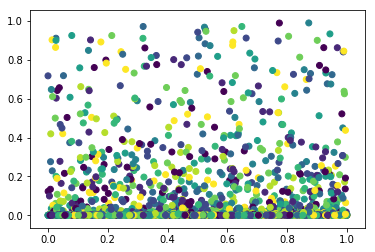

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

In [60]:
X_with_clusters[:, 2]

array([2., 4., 9., ..., 6., 9., 0.])

**Сам алгоритм:**

In [61]:
import time
cur_clusters = np.zeros(n_samples, float)
#print( np.shape(cur_clusters) )
difference = 5
start_time = time.clock()
while (np.max(difference) != 0):
    prev_centers = np.copy(centers)
    j = 0
    center_X_difference = X[:, None] - centers
    cur_clusters = np.argsort(np.linalg.norm(center_X_difference, axis = 2), axis = 1)[:, 0]
    X_with_clusters[:, 2] = cur_clusters    
    for k in range(n_clusters):
        power_of_cluster = np.alen(X[X_with_clusters[:,2] == k ])
        if power_of_cluster != 0:
            centers[k, :] = np.nansum(X[X_with_clusters[:, 2] == k], axis=0) / power_of_cluster
    difference = np.linalg.norm((centers - prev_centers), axis=1)
    #print(difference)
    #plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])
print(time.clock() - start_time)

0.18167500000000203


**После работы алгоритма:**

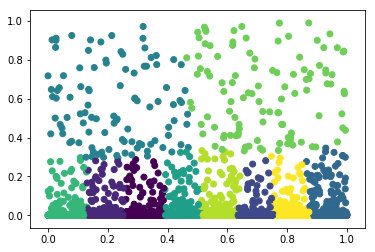

In [62]:
X_with_clusters.astype(int)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:,2])

**Сравним с работой алгоритма KMeans( sklearn )**

0.3953479999999985


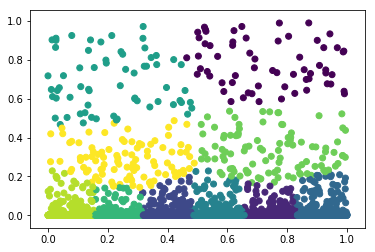

In [63]:
from sklearn.cluster import KMeans
X1 = np.copy(X_start)
time_start2 = time.clock()
a = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X1)
print( time.clock() - time_start2 )

plt.scatter(X1[:, 0], X1[:, 1], c=a)

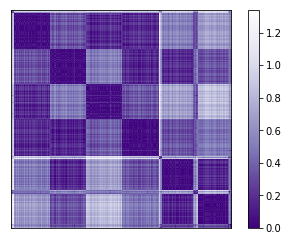

In [64]:
i  = np.argsort(a)
X2 = X1[i, :]

D = (X2[:,0][:, np.newaxis] - X2[:,0]) ** 2
D += (X2[:,1][:, np.newaxis] - X2[:,1]) ** 2
D = np.sqrt(D)

plt.figure(figsize=(5, 4))
plt.imshow(D, cmap='Purples_r', aspect='auto')
plt.xticks([])
plt.yticks([])
plt.colorbar(orientation='vertical', pad=0.06);

##Поиск моделей, на которых k-means работает не так, как мы ожидаем:

**1) Две окружности, одна из которых достаточно маленького радиуса, находящаяся внутри окр. бОльшего радиуса**

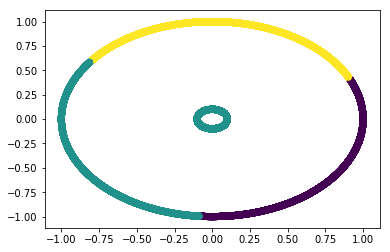

In [15]:
from sklearn.datasets import make_circles
X = make_circles(n_samples=n_samples, random_state=2, factor=.1)
X = np.array(X[0])
a = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=a)



**2) Алгоритм плохо кластеризует окружности( этот пример чем-то похож на тот, который был на лекции )**

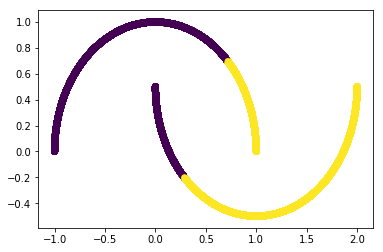

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=n_samples, random_state=11)
X = np.append(X, make_moons(n_samples=n_samples, shuffle=True, random_state=10)[0], axis=0 )
a = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c=a)
